In [1]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [2]:
fetch_housing_data()

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [4]:
def load_housing_data(path):
    return pd.read_csv(path)
    

In [5]:
hs_path = os.path.join(HOUSING_PATH, "housing.csv")
df = load_housing_data(hs_path)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.5+ MB


In [7]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
df["ocean_proximity"].describe()

count         20640
unique            5
top       <1H OCEAN
freq           9136
Name: ocean_proximity, dtype: object

In [9]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


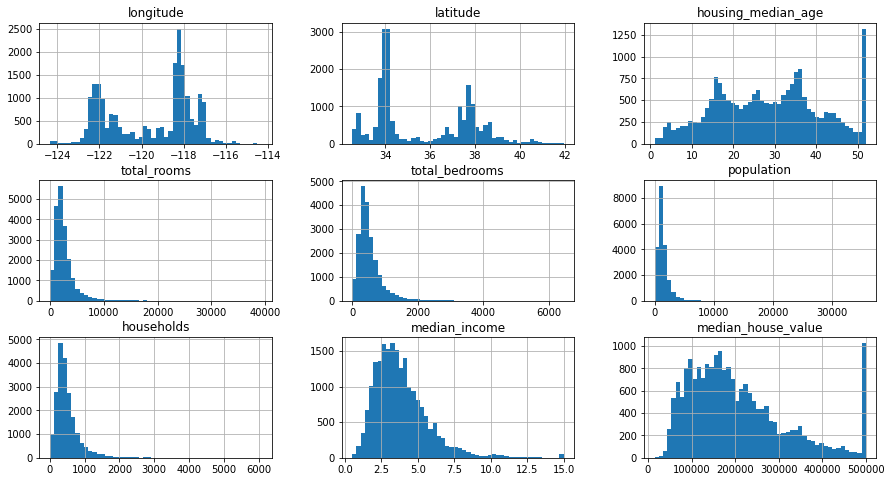

In [10]:
df.hist(figsize=(15, 8), bins=50);

In [11]:
def split_train_test_my(data, test_ratio):
    data = np.shuffle(data)
    test_amount = test_ratio*len(data)
    test = data[:test_amount]
    train = data[test_amount:]
    return train, test

In [12]:
def split_train_test(data, test_ratio):
    perms = np.random.permutation(len(data))
    test_amount = int(len(data)*test_ratio)
    test_idx = perms[:test_amount]
    train_idx = perms[test_amount:]
    return data.iloc[train_idx], data.iloc[test_idx]

In [13]:
train_data, test_data = split_train_test(df, 0.2)

In [14]:
len(train_data)

16512

In [15]:
len(test_data)

4128

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_sk, test_sk = train_test_split(df, test_size=0.2, random_state=42)

In [18]:
df["income_cat"] = pd.cut(df["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

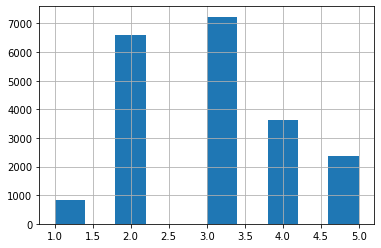

In [19]:
df["income_cat"].hist();

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
df.head()
# for tr_idx, test_idx in split.split(df, df["income_cat"]):
#     strat_train = df.iloc[tr_idx]
#     strat_test = df.iloc[test_idx]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


In [22]:
df = df.drop(["income_cat"], axis=1)

In [23]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [24]:
df_train = train_sk

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.3+ MB


In [26]:
test_sk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4128 entries, 20046 to 3665
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           4128 non-null   float64
 1   latitude            4128 non-null   float64
 2   housing_median_age  4128 non-null   float64
 3   total_rooms         4128 non-null   float64
 4   total_bedrooms      3921 non-null   float64
 5   population          4128 non-null   float64
 6   households          4128 non-null   float64
 7   median_income       4128 non-null   float64
 8   median_house_value  4128 non-null   float64
 9   ocean_proximity     4128 non-null   object 
dtypes: float64(9), object(1)
memory usage: 338.6+ KB


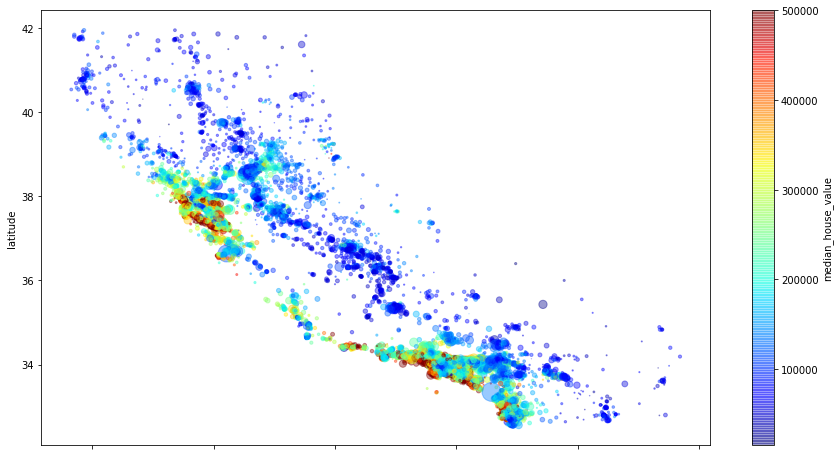

In [27]:
df_train.plot(kind="scatter", x="longitude", y="latitude",c="median_house_value",s=df_train["population"]/100,figsize=(15,8) ,alpha=0.4, colormap=plt.get_cmap("jet"));

In [28]:
corr_matrix = df_train.corr()

In [29]:
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924485,-0.101818,0.038676,0.063064,0.094276,0.049306,-0.017040,-0.046349
latitude,-0.924485,1.000000,0.005296,-0.029224,-0.059998,-0.102499,-0.064061,-0.076571,-0.142983
housing_median_age,-0.101818,0.005296,1.000000,-0.360922,-0.320624,-0.292283,-0.302796,-0.121711,0.103706
total_rooms,0.038676,-0.029224,-0.360922,1.000000,0.930489,0.857936,0.920482,0.198268,0.133989
total_bedrooms,0.063064,-0.059998,-0.320624,0.930489,1.000000,0.878932,0.980255,-0.009141,0.047980
population,0.094276,-0.102499,-0.292283,0.857936,0.878932,1.000000,0.907452,0.004122,-0.026032
households,0.049306,-0.064061,-0.302796,0.920482,0.980255,0.907452,1.000000,0.012776,0.063714
median_income,-0.017040,-0.076571,-0.121711,0.198268,-0.009141,0.004122,0.012776,1.000000,0.690647
median_house_value,-0.046349,-0.142983,0.103706,0.133989,0.047980,-0.026032,0.063714,0.690647,1.000000


In [30]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

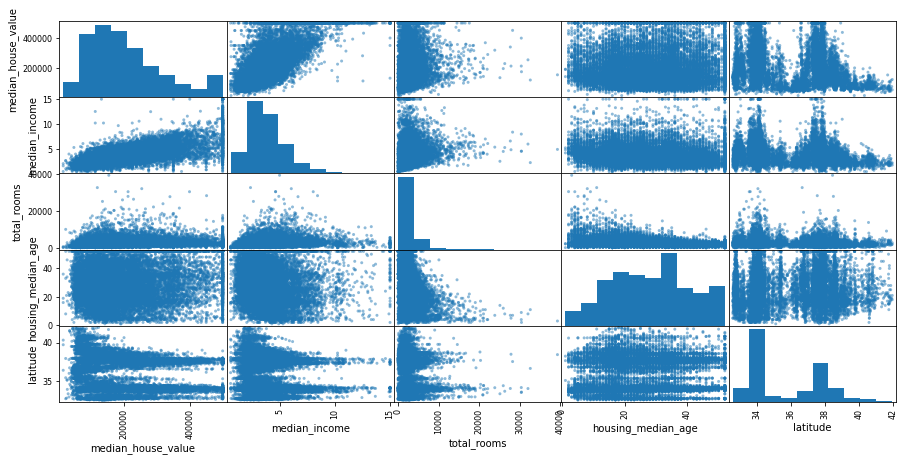

In [31]:
pd.plotting.scatter_matrix(df_train[["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]], figsize=(15,7));

In [32]:
df_train["rooms_per_household"] = df_train["total_rooms"]/df_train["households"]
df_train["bedrooms_per_room"] = df_train["total_bedrooms"]/df_train["total_rooms"]
df_train["population_per_household"]=df_train["population"]/df_train["households"]

In [33]:
corr_matrix = df_train.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

In [35]:
X = df_train.drop(["median_house_value"], axis=1)
y = df_train["median_house_value"]

In [36]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND,6.268421,0.180940,2.300000


<AxesSubplot:>

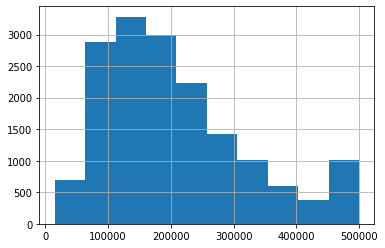

In [37]:
y.hist()


In [38]:
from sklearn.impute import SimpleImputer

In [39]:
imputer = SimpleImputer(strategy="median")

In [40]:
X_without_objs = X.drop(["ocean_proximity"], axis=1)

In [41]:
imputer.fit(X_without_objs)

SimpleImputer(strategy='median')

In [42]:
imputer.statistics_

array([-1.18510000e+02,  3.42600000e+01,  2.90000000e+01,  2.12900000e+03,
        4.37000000e+02,  1.16700000e+03,  4.10000000e+02,  3.54580000e+00,
        5.23587365e+00,  2.02807652e-01,  2.81723971e+00])

In [43]:
imputer.transform(X_without_objs)

array([[-117.03      ,   32.71      ,   33.        , ...,    5.0176565 ,
           0.20057582,    3.6918138 ],
       [-118.16      ,   33.77      ,   49.        , ...,    4.47354497,
           0.23270254,    1.73809524],
       [-120.48      ,   34.66      ,    4.        , ...,    5.64583333,
           0.17448603,    2.72321429],
       ...,
       [-118.38      ,   34.03      ,   36.        , ...,    3.98671727,
           0.27082342,    3.33206831],
       [-121.96      ,   37.58      ,   15.        , ...,    6.39534884,
           0.16699301,    3.17889088],
       [-122.42      ,   37.77      ,   52.        , ...,    3.40257649,
           0.31116895,    2.10869565]])

In [44]:
from sklearn.preprocessing import OrdinalEncoder

In [45]:
ord_encoder = OrdinalEncoder()

In [46]:
ocean_proximity_encoded = ord_encoder.fit_transform(X[["ocean_proximity"]])

In [47]:
ord_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [48]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [49]:
ohEncoder = OneHotEncoder()

In [50]:
op_one_hot = ohEncoder.fit_transform(X[["ocean_proximity"]])

In [51]:
op_one_hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [53]:
num_pipline = Pipeline([('imputer', SimpleImputer(strategy="median")), ('std_scaler', StandardScaler())])

In [54]:
full_pipeline = ColumnTransformer([
    ("num", num_pipline, list(X_without_objs)),
    ("cat", OneHotEncoder(), ["ocean_proximity"])
])

In [55]:
data_final = full_pipeline.fit_transform(X)

In [56]:
data_final


array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])

## Model Selection

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
data = data_final
labels = list(y)

In [59]:
model = LinearRegression()

In [60]:
model.fit(data, labels)

LinearRegression()

In [61]:
preds = model.predict(data[:5])

In [62]:
labels[:5]

[103000.0, 382100.0, 172600.0, 93400.0, 96500.0]

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
l = y.to_numpy()

In [65]:
l

array([103000., 382100., 172600., ..., 222100., 283500., 325000.])

In [66]:
mse = mean_squared_error(l[:5], preds)

In [67]:
rmse = np.sqrt(mse)

In [68]:
rmse

73605.47230869904

In [69]:
from sklearn.tree import DecisionTreeRegressor 

In [70]:
dtModel = DecisionTreeRegressor()

In [71]:
dtModel.fit(data, l)

DecisionTreeRegressor()

In [72]:
preds_dt = dtModel.predict(data[:5])

In [73]:
preds_dt

array([103000., 382100., 172600.,  93400.,  96500.])

In [74]:
l[:5]

array([103000., 382100., 172600.,  93400.,  96500.])

In [75]:
rmse_dt = np.sqrt(mean_squared_error(l[:5], l[:5]))
rmse

73605.47230869904

In [76]:
list(labels[:5])

[103000.0, 382100.0, 172600.0, 93400.0, 96500.0]